In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot4
import pathlib
import seaborn as sns
import sys
import json

# Jupyter Lab imports.
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

# Path to local imports.
sys.path.append("C:/Users/RJ/OneDrive - North Carolina State University/Research/CRES/he6-cres-spec-sims/")
# from results import ExperimentResults
# from rocks_utility import he6cres_db_query

# Local imports.
import he6_cres_spec_sims.spec_tools.spec_calc.spec_calc as sc
import he6_cres_spec_sims.experiment as exp
from he6_cres_spec_sims.experiment import ExpResults

## Step 1: Run the simulated experiment.

Follow the instructions in the [readme.md](https://github.com/Helium6CRES/he6-cres-spec-sims/tree/feature/rocks_dev) for running the experiment.

The below is the function call I use (from within `he6-cres-spec-sims`). Change the paths and you're good to go.

`./run_local_experiment.py -exp "/media/drew/T7 Shield/spec_sims_results/local_experiments/local_exp_config_example.json"
`


## Step 2: Load the results. 

Now use the class `ExpResults` from the `experiment.py` module to grab the experiment results. 

There is a `.yaml` summary file that is created by the simulation run that is in the simulation directory that is built. There are now three different config files and I know that it's a bit confusing. But you can load the results of the experiment by pointing to that `.yaml` summary file which will have the form: `{experiment name}_exp.yaml` and will be inside the experiment directory.  

In [175]:
experiment_config_path = "C:/Users/RJ/OneDrive - North Carolina State University/Research/CRES/spec_sims_results/local_experiments/SNR_dev/SNR_dev_exp.yaml"
experiment_config_path = "C:/Users/RJ/OneDrive - North Carolina State University/Research/CRES/he6-cres-spec-sims/config_files/spec_example/spec_example_exp.yaml"
sim = ExpResults.load(experiment_config_path =experiment_config_path)

C:\Users\RJ\OneDrive - North Carolina State University\Research\CRES\he6-cres-spec-sims\config_files\spec_example
+++++++++++++++++++++++++++++++++++++++++++++++++


Loading simulation 0 / 1


+++++++++++++++++++++++++++++++++++++++++++++++++
Optimization terminated successfully.
         Current function value: -1.001679
         Iterations: 43
         Function evaluations: 96
Trap width: (-0.043193920135498054,0.043193920135498054)
Maximum Field: 1.001679364037366

Set field: 1.0, Trap current: 0.830769



## Step 3: Tools for exploratory analysis. 

In [176]:
sim.__dict__

{'experiment_params': {'experiment_name': 'spec_example',
  'base_config_path': 'C:/Users/RJ/OneDrive - North Carolina State University/Research/CRES/he6-cres-spec-sims/config_files/spec_example.yaml',
  'isotope': 'He6',
  'events_to_simulate': -1,
  'betas_to_simulate': 10.0,
  'rand_seeds': [2023, 715, 1100],
  'fields_T': [1.0],
  'traps_A': [0.830769]},
 'config_paths': [WindowsPath('C:/Users/RJ/OneDrive - North Carolina State University/Research/CRES/he6-cres-spec-sims/config_files/spec_example/0_field_1.0T.yaml')],
 'sampled_gammas': None,
 'tracks':           energy     gamma    energy_stop  initial_rho_pos  initial_phi_pos  \
 0  270448.465440  1.529254  270433.979809         0.004198       237.805354   
 1  260425.351044  1.509640  259961.556395         0.004198       237.805354   
 2  249955.815519  1.489151  249827.414475         0.004198       237.805354   
 3  273309.473675  1.534853  273286.869572         0.002524       170.589144   
 4  263291.605803  1.515249  263247.9

In [179]:
sim.tracks["event_num"]

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    1.0
Name: event_num, dtype: float64

In [180]:
sim.tracks.head()

,energy,gamma,energy_stop,initial_rho_pos,initial_phi_pos,initial_zpos,initial_theta,cos_initial_theta,initial_phi_dir,center_theta,...,energy_accept_low,gamma_accept_high,gamma_accept_low,time_start,time_stop,file_in_acq,freq_start,simulation_num,field,trap_current
0,270448.465440,1.529254,270433.979809,0.004198,237.805354,0.000692,89.255824,0.012988,86.853457,89.229332,...,237908.533385,1.555138,1.465575,0.003642,0.003750,1.0,3.434303e+08,0,1.0,0.830769
1,260425.351044,1.509640,259961.556395,0.004198,237.805354,0.000000,89.229332,0.013450,86.853457,89.229332,...,237908.533385,1.555138,1.465575,0.003750,0.007367,1.0,5.804594e+08,0,1.0,0.830769
2,249955.815519,1.489151,249827.414475,0.004198,237.805354,0.000000,89.229332,0.013450,86.853457,89.229332,...,237908.533385,1.555138,1.465575,0.007367,0.008419,1.0,8.347110e+08,0,1.0,0.830769
3,273309.473675,1.534853,273286.869572,0.002524,170.589144,0.000329,89.612266,0.006767,42.428767,89.600923,...,237908.533385,1.555138,1.465575,0.002051,0.002218,0.0,2.759396e+08,0,1.0,0.830769
4,263291.605803,1.515249,263247.977464,0.002524,170.589144,0.000000,89.600923,0.006965,42.428767,89.600923,...,237908.533385,1.555138,1.465575,0.002218,0.002554,0.0,5.111477e+08,0,1.0,0.830769


In [172]:
sim.tracks.columns

Index(['energy', 'gamma', 'energy_stop', 'initial_rho_pos', 'initial_phi_pos',
       'initial_zpos', 'initial_theta', 'cos_initial_theta', 'initial_phi_dir',
       'center_theta', 'cos_center_theta', 'initial_field', 'initial_radius',
       'center_x', 'center_y', 'rho_center', 'trapped_initial_theta',
       'max_radius', 'min_radius', 'avg_cycl_freq', 'b_avg', 'freq_stop',
       'zmax', 'axial_freq', 'mod_index', 'segment_power', 'slope',
       'segment_length', 'band_power_start', 'band_power_stop', 'band_num',
       'segment_num', 'event_num', 'beta_num', 'fraction_of_spectrum',
       'energy_accept_high', 'energy_accept_low', 'gamma_accept_high',
       'gamma_accept_low', 'time_start', 'time_stop', 'file_in_acq',
       'freq_start', 'simulation_num', 'field', 'trap_current'],
      dtype='object')

In [107]:
%matplotlib widget

df = sim.tracks
df_categorical = df.loc[:, df.apply(lambda x: x.nunique()) <= 20]
fields = sorted(df['field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = fields,  description='set_field: '),
    column_1 = widgets.Select(options = df.columns,value = 'energy', description='x_col: '),
    column_2 = widgets.Select(options = df.columns,value = 'b_avg', description='y_col: '),
    column_3 = widgets.Select(options = df_categorical.columns,value = 'field', description='hue_col: '),
    mrk_sz = widgets.FloatSlider(value=.4, min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=.5, min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    
    plt.close("all")

    sns.lmplot(data=df, x=column_1, y=column_2, hue=column_3, fit_reg=False, scatter_kws={'s': mrk_sz, 'alpha': alpha})
    plt.show()

interactive(children=(Select(description='set_field: ', options=(1.0,), value=1.0), Select(description='x_col:…

In [164]:
def plot_noise_gain(gain_noise_csv_path):
    pd.read_csv(gain_noise_csv_path).set_index("freq").plot.line()
    plt.show()
    return None


def plot_sparse_spec(spec_array, spec_length, freq_bw, snr_cut=5):

    cut_condition = np.array(
        (spec_array > spec_array.mean(axis=0) * snr_cut).T, dtype=float
    )
    extent = [0, spec_length, 0, freq_bw]

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.imshow(
        1 - cut_condition,
        origin="lower",
        aspect="auto",
        interpolation=None,
        cmap="gray",
        extent=extent,
    )

    ax.set_title("Sparse Spectrogram")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Freq (Hz)")
    plt.show()

    return None


def plot_tracks(tracks, file_in_acq, freq_bw, spec_length):

    condition = tracks.file_in_acq == file_in_acq

    fig, ax = plt.subplots(figsize=(12, 8))

    for index, row in tracks[condition].iterrows():

        time_coor = np.array([row["time_start"], row["time_stop"]])
        freq_coor = np.array([row["freq_start"], row["freq_stop"]])

        ax.plot(
            time_coor,
            freq_coor,
            "yo-",
            markersize=0.5,
            alpha=0.5,
        )
    ax.set_ylim(0, freq_bw)
    ax.set_xlim(0,spec_length)
    ax.set_title("tracks")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Freq (Hz)")
    plt.show()

    return None

def spec_to_array(spec_path,freq_bins=4096, slices=-1, packets_per_slice=1, start_packet=None
    ):
        """
        TODO: Document.
        Making this just work for one packet per spectrum because that works for simulation in Katydid.
        * Make another function that works with 4 packets per spectrum (for reading the Kr data).
        """

        BYTES_IN_PAYLOAD = freq_bins
        BYTES_IN_HEADER = 32
        BYTES_IN_PACKET = BYTES_IN_PAYLOAD + BYTES_IN_HEADER

        if slices == -1:
            spec_array = np.fromfile(spec_path, dtype="uint8", count=-1).reshape(
                (-1, BYTES_IN_PACKET)
            )[:, BYTES_IN_HEADER:]
        else:
            spec_array = np.fromfile(
                spec_path, dtype="uint8", count=BYTES_IN_PAYLOAD * slices
            ).reshape((-1, BYTES_IN_PACKET))[:, BYTES_IN_HEADER:]

        if packets_per_slice > 1:

            spec_flat_list = [
                spec_array[(start_packet + i) % packets_per_slice :: packets_per_slice]
                for i in range(packets_per_slice)
            ]
            spec_flat = np.concatenate(spec_flat_list, axis=1)
            spec_array = spec_flat

        print(spec_array.shape)

        return spec_array

In [187]:

spec_path = "C:/Users/RJ/OneDrive - North Carolina State University/Research/CRES/he6-cres-spec-sims/config_files/spec_example/0_field_1.0T/spec_files/SNR_dev_spec_1.spec"
spec_array = spec_to_array(spec_path)

(878, 4096)


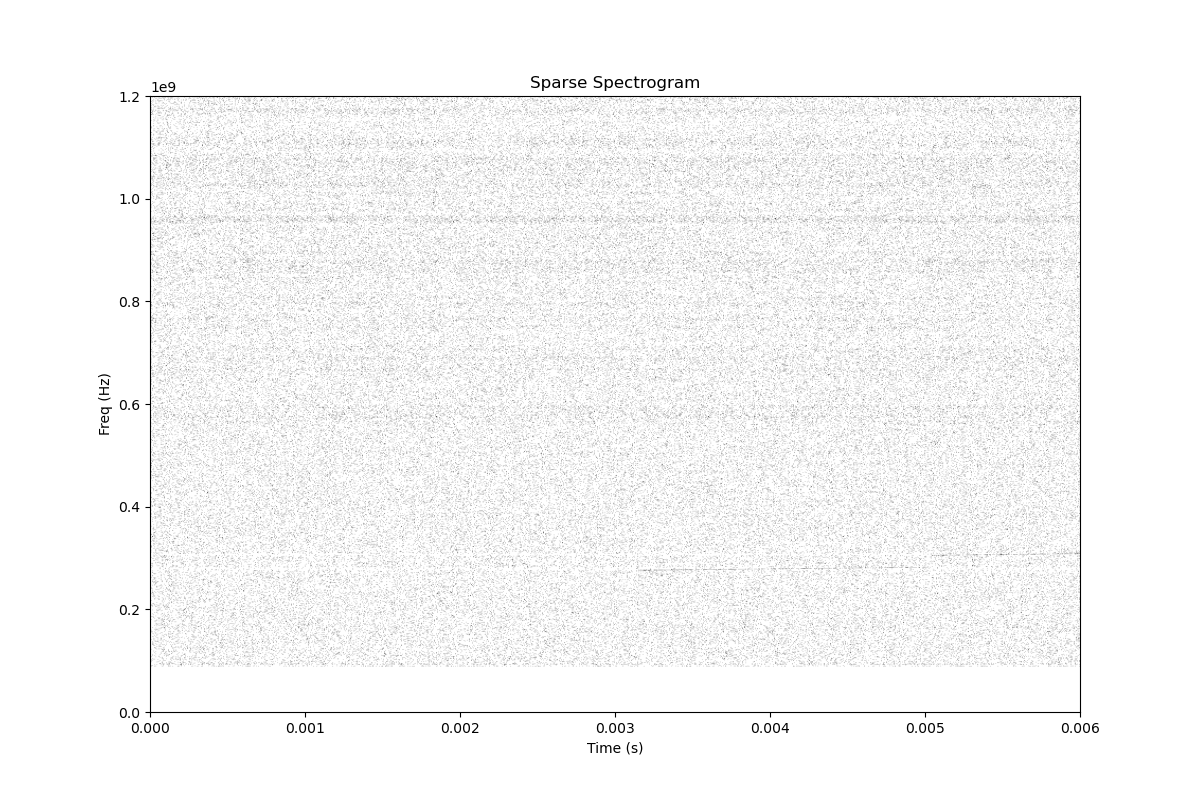

In [189]:
plot_sparse_spec(spec_array, 0.006, 1.2e+9, snr_cut=3)

C:\Users\RJ\OneDrive - North Carolina State University\Research\CRES\he6-cres-spec-sims\config_files\spec_example
+++++++++++++++++++++++++++++++++++++++++++++++++


Loading simulation 0 / 1


+++++++++++++++++++++++++++++++++++++++++++++++++
Optimization terminated successfully.
         Current function value: -1.001679
         Iterations: 43
         Function evaluations: 96
Trap width: (-0.043193920135498054,0.043193920135498054)
Maximum Field: 1.001679364037366

Set field: 1.0, Trap current: 0.830769



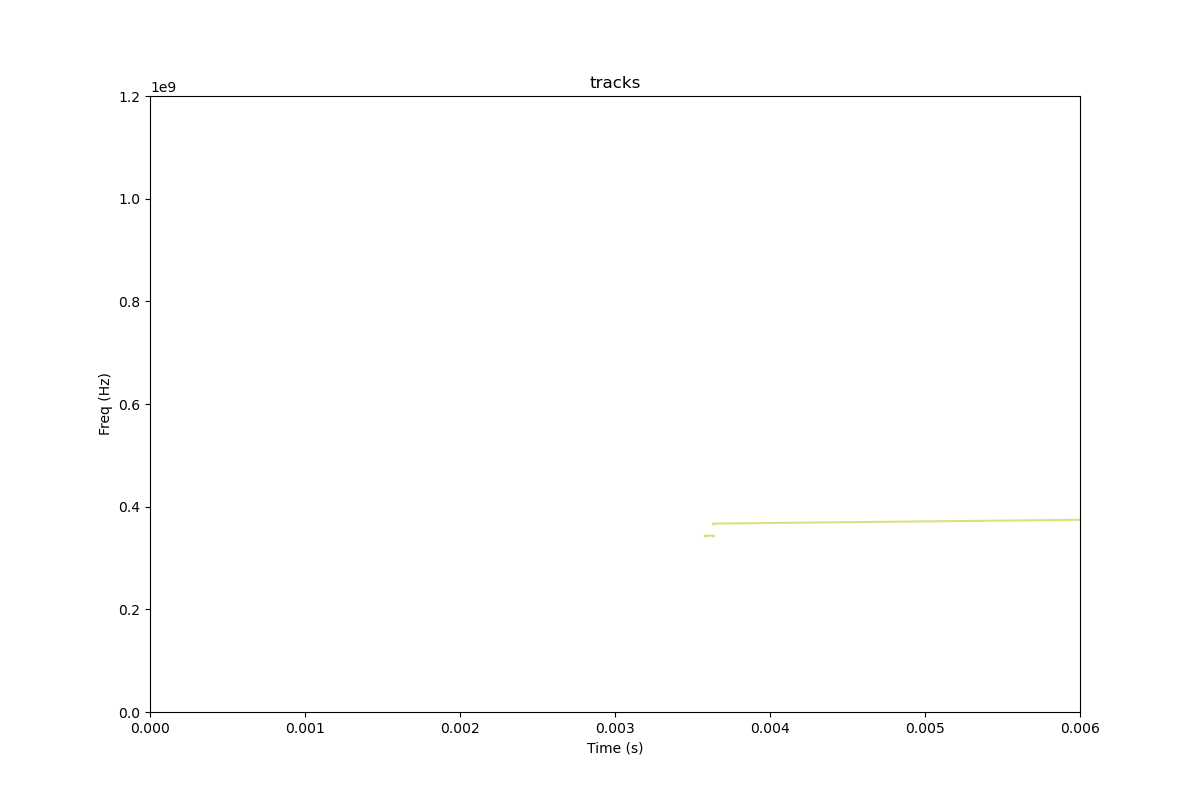

In [184]:
sim = ExpResults.load(experiment_config_path =experiment_config_path)
tracks = sim.tracks[sim.tracks['field'] == 1]
plot_tracks(tracks, 0, 1.2e9, 0.006)

In [13]:
tracks[tracks['file_in_acq'] == 8.0]["band_power_start"]

0     1.685967e-15
24    1.845543e-15
35    2.453181e-15
39    2.164999e-15
41    2.670913e-15
47    2.449480e-15
54    2.654218e-15
Name: band_power_start, dtype: float64

In [ ]:
# ---- Visuzlize first spec file ----
file_in_acq = 0
spec_path = daq.spec_file_paths[file_in_acq]
spec_array = daq.spec_to_array(spec_path, slices=-1)
plot_sparse_spec(spec_array, spec_length, freq_bw)
plot_tracks(tracks, file_in_acq, freq_bw)
plot_noise_gain(config.daq.gain_noise_csv_path)

In [7]:
noise_file = "C:\\Users\\RJ\\OneDrive\\School Work\\NCSU\\Research\\CRES\\NoiseAnalysis\\Phase2NoiseFloorComparison_fixed.csv"
noise = pd.read_csv(noise_file)

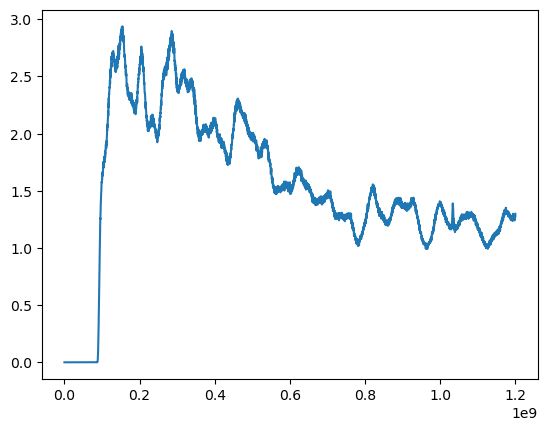

In [8]:
freq = np.linspace(0,1.2e9,len(noise["582_x"]))
gain_factor = 1e16
noise_ave = np.full(len(freq), np.average(noise["582_y"]))/gain_factor
gain = noise["582_y"]/noise_ave

plt.figure()
plt.plot(freq, noise["582_y"])
# plt.plot(freq, gain)
# plt.plot(freq, gain*noise_ave, ":")
# plt.plot(noise["511_x"], noise["511_y"])
# plt.plot(freq, noise_ave)
plt.show()

In [20]:
noise_new = pd.DataFrame()

In [44]:
noise_new["freq"] = freq
noise_new["gain"] = gain
noise_new["noise_mean"] = noise_ave
noise_new.to_csv("C:/Users/RJ/OneDrive - North Carolina State University/Research/CRES/he6-cres-spec-sims/RJ_testing/noise.csv")

In [42]:
noise_new.freq

0       1.790000e+10
1       1.790029e+10
2       1.790059e+10
3       1.790088e+10
4       1.790117e+10
            ...     
4091    1.909883e+10
4092    1.909912e+10
4093    1.909941e+10
4094    1.909971e+10
4095    1.910000e+10
Name: freq, Length: 4096, dtype: float64

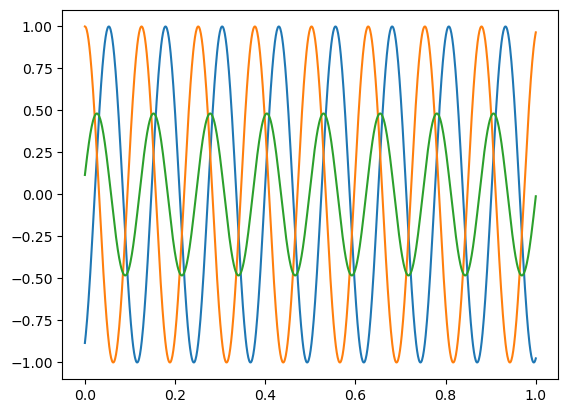

In [55]:
x = np.linspace(0,1,1000)
n = np.cos((50)*x+500)
s = np.cos((50)*x)
plt.plot(x,n)
plt.plot(x,s)
plt.plot(x,s+n)
plt.show()

In [62]:
Ps = np.real(np.fft.fft(s)[:500])**2

In [68]:
Ps

array([1.81362889e+01, 1.87234658e+01, 2.06664382e+01, 2.46473451e+01,
       3.24763612e+01, 4.94989358e+01, 9.72120399e+01, 3.51167884e+02,
       2.45112458e+05, 2.38921875e+02, 5.51729432e+01, 2.22958480e+01,
       1.14047895e+01, 6.65715390e+00, 4.23167964e+00, 2.85630575e+00,
       2.01630557e+00, 1.47387384e+00, 1.10801002e+00, 8.52437660e-01,
       6.68677035e-01, 5.33304962e-01, 4.31492980e-01, 3.53537736e-01,
       2.92907108e-01, 2.45094463e-01, 2.06923006e-01, 1.76110400e-01,
       1.50988937e-01, 1.30321374e-01, 1.13177161e-01, 9.88476637e-02,
       8.67870815e-02, 7.65706445e-02, 6.78645992e-02, 6.04043821e-02,
       5.39785548e-02, 4.84168471e-02, 4.35811676e-02, 3.93587781e-02,
       3.56570669e-02, 3.23995116e-02, 2.95225362e-02, 2.69730478e-02,
       2.47064909e-02, 2.26853018e-02, 2.08776722e-02, 1.92565558e-02,
       1.77988639e-02, 1.64848122e-02, 1.52973874e-02, 1.42219085e-02,
       1.32456657e-02, 1.23576216e-02, 1.15481621e-02, 1.08088888e-02,
      

In [64]:
Pn = np.real(np.fft.fft(n)[:500])**2
Pt = np.real(np.fft.fft(s+n)[:500])**2

(0.0, 20.0)

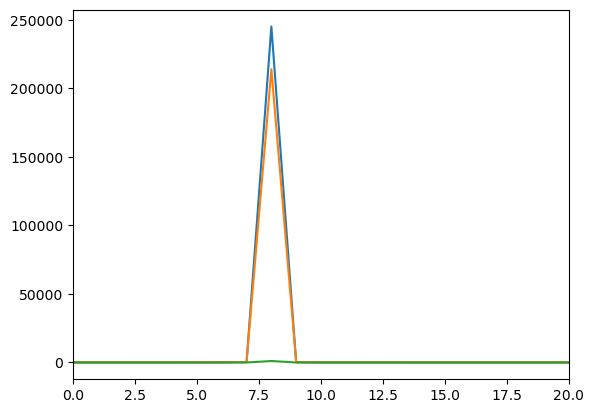

In [69]:
plt.plot(Ps)
plt.plot(Pn)
plt.plot(Pt)
plt.xlim(0,20)

In [71]:
Ps[8], Pn[8],Pt[8]

(245112.4583899579, 213976.21474622228, 1057.0758268936445)

In [73]:
Fn = np.fft.fft(n)[:500]
Fs = np.fft.fft(s)[:500]
Ft = np.fft.fft(s+n)[:500]
def P(F):
    return np.real(F)**2


In [75]:
P(Fn)[8]+P(Fs)[8], P(Ft)[8], P(Fn+Fs)[8]

(459088.67313618015, 1057.0758268936445, 1057.0758268936477)